In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
import wandb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
url = "https://datamillnorth.org/download/customer-meter-data/b9f2cc02-3fe2-42ae-8470-b2e5d96af712/201415%20YW%20Customer%20Meter%20Data.csv"
df = pd.read_csv(url)

In [6]:
df.head()

,POSTAL_TOWN,POSTCODE_OUTCODE,PROPERTY_CLASS,METER_KEY,READING_START_DATE,READING_END_DATE,READING_START_READING,READING_END_READING,GROSS_CONSUMPTION,DAILY_AVERAGE_CONSUMPTION,READING_SOURCE,CUSTOMER_TYPE,BILLPAYER_AGE,CURRENT_OCCUPANCY_AGE
0,NaN,NaN,NaN,1012229,27/06/2014 00:00,08/09/2014 00:00,339.0,345.0,6,0.081,Actual Automated Meter Reading,,NaN,5.0
1,NaN,NaN,NaN,1012229,06/12/2014 00:00,09/03/2015 00:00,360.0,386.0,26,0.277,Actual Automated Meter Reading,,NaN,0.0
2,NaN,,All new Domestic Properties,755928,11/02/2014 00:00,29/04/2014 00:00,2678.0,2716.0,38,0.487,Actual Automated Meter Reading,,NaN,8.0
3,NaN,,All new Domestic Properties,755928,09/08/2014 00:00,10/11/2014 00:00,2768.0,2845.0,77,0.819,Actual Automated Meter Reading,,NaN,8.0
4,NaN,,House RV 100-124,882360,25/01/2014 00:00,24/04/2014 00:00,98.0,102.0,4,0.044,Actual Automated Meter Reading,,81+,7.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2485511 entries, 0 to 2485510
Data columns (total 14 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   POSTAL_TOWN                object 
 1   POSTCODE_OUTCODE           object 
 2   PROPERTY_CLASS             object 
 3   METER_KEY                  int64  
 4   READING_START_DATE         object 
 5   READING_END_DATE           object 
 6   READING_START_READING      float64
 7   READING_END_READING        float64
 8   GROSS_CONSUMPTION          int64  
 9   DAILY_AVERAGE_CONSUMPTION  float64
 10  READING_SOURCE             object 
 11  CUSTOMER_TYPE              object 
 12  BILLPAYER_AGE              object 
 13  CURRENT_OCCUPANCY_AGE      float64
dtypes: float64(4), int64(2), object(8)
memory usage: 265.5+ MB


In [8]:
df.head()

,POSTAL_TOWN,POSTCODE_OUTCODE,PROPERTY_CLASS,METER_KEY,READING_START_DATE,READING_END_DATE,READING_START_READING,READING_END_READING,GROSS_CONSUMPTION,DAILY_AVERAGE_CONSUMPTION,READING_SOURCE,CUSTOMER_TYPE,BILLPAYER_AGE,CURRENT_OCCUPANCY_AGE
0,NaN,NaN,NaN,1012229,27/06/2014 00:00,08/09/2014 00:00,339.0,345.0,6,0.081,Actual Automated Meter Reading,,NaN,5.0
1,NaN,NaN,NaN,1012229,06/12/2014 00:00,09/03/2015 00:00,360.0,386.0,26,0.277,Actual Automated Meter Reading,,NaN,0.0
2,NaN,,All new Domestic Properties,755928,11/02/2014 00:00,29/04/2014 00:00,2678.0,2716.0,38,0.487,Actual Automated Meter Reading,,NaN,8.0
3,NaN,,All new Domestic Properties,755928,09/08/2014 00:00,10/11/2014 00:00,2768.0,2845.0,77,0.819,Actual Automated Meter Reading,,NaN,8.0
4,NaN,,House RV 100-124,882360,25/01/2014 00:00,24/04/2014 00:00,98.0,102.0,4,0.044,Actual Automated Meter Reading,,81+,7.0


In [9]:
df.groupby(['METER_KEY']).mean()


,READING_START_READING,READING_END_READING,GROSS_CONSUMPTION,DAILY_AVERAGE_CONSUMPTION,CURRENT_OCCUPANCY_AGE
METER_KEY,,,,,
2,49.5,55.5,6.0,0.0785,18.0
3,446.0,455.0,9.0,0.0985,18.0
4,64.5,70.5,6.0,0.0715,6.0
5,71.5,80.5,9.0,0.1125,7.0
6,87.5,99.5,12.0,0.1540,18.0
...,...,...,...,...,...
1280072,0.0,0.0,0.0,0.0000,0.0
1280073,0.0,0.0,0.0,0.0000,0.0
1280074,0.0,0.0,0.0,0.0000,0.0


In [10]:
df.isnull().sum()

POSTAL_TOWN                     252
POSTCODE_OUTCODE                  2
PROPERTY_CLASS                    2
METER_KEY                         0
READING_START_DATE                0
READING_END_DATE                  0
READING_START_READING             3
READING_END_READING              10
GROSS_CONSUMPTION                 0
DAILY_AVERAGE_CONSUMPTION         0
READING_SOURCE                    0
CUSTOMER_TYPE                  1736
BILLPAYER_AGE                390801
CURRENT_OCCUPANCY_AGE        206643
dtype: int64

In [11]:
#sns.displot(df['DAILY_AVERAGE_CONSUMPTION'])

In [42]:
df = df.drop_duplicates(keep='first')
df2 = df[["METER_KEY","CUSTOMER_TYPE","POSTAL_TOWN","DAILY_AVERAGE_CONSUMPTION","GROSS_CONSUMPTION"]]

In [43]:
df2['POSTAL_TOWN'].unique()
#df['POSTCODE_OUTCODE'].unique()

array([nan, 'Barnoldswick', 'Bradford', 'Bingley', 'Shipley',
       'Cleckheaton', 'Keighley', 'Skipton', 'Settle', 'Richmond',
       'Darlington', 'Northallerton', 'Bedale', 'Catterick Garrison',
       'Doncaster', 'Goole', 'Scunthorpe', 'Huddersfield', 'Harrogate',
       'Ripon', 'Knaresborough', 'Hull', 'Hessle', 'North Ferriby',
       'Brough', 'Cottingham', 'Beverley', 'Hornsea', 'Withernsea',
       'Halifax', 'Elland', 'Sowerby Bridge', 'Hebden Bridge',
       'Lancaster', 'Carnforth', 'Leeds', 'Otley', 'Wetherby',
       'Tadcaster', 'Pudsey', 'Ilkley', 'Todmorden', 'Sheffield',
       'Rotherham', 'Mexborough', 'Barnsley', 'Worksop',
       'Saltburn-By-The-Sea', 'Wakefield', 'Castleford', 'Knottingley',
       'Dewsbury', 'Mirfield', 'Liversedge', 'Heckmondwike', 'Batley',
       'Ossett', 'Normanton', 'Pontefract', 'York', 'Scarborough',
       'Filey', 'Bridlington', 'Malton', 'Pickering', 'Whitby',
       'Driffield', 'Thirsk', 'Selby'], dtype=object)

In [14]:
df2=df2.dropna(subset=["POSTAL_TOWN"])
df2

,METER_KEY,CUSTOMER_TYPE,POSTAL_TOWN,DAILY_AVERAGE_CONSUMPTION,GROSS_CONSUMPTION
227,89828,,Barnoldswick,0.288,30
228,89828,,Barnoldswick,0.459,39
229,89835,,Barnoldswick,0.490,51
230,89835,,Barnoldswick,0.581,50
231,89836,,Barnoldswick,0.106,11
...,...,...,...,...,...
2485499,1270351,,Selby,0.000,0
2485500,1270358,,Selby,0.000,0
2485501,1270383,,Selby,0.000,0
2485502,1272227,,Selby,0.000,0


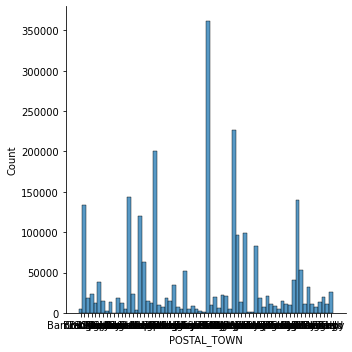

In [15]:
sns.displot(df2['POSTAL_TOWN'])

In [16]:
# # import the library
# import folium

# # Make an empty map
# m = folium.Map(location=[20,0], tiles="OpenStreetMap", zoom_start=2)

# # Show the map
# m

# # Make a data frame with dots to show on the map
# data = pd.DataFrame({
#    'lon':[-58, 2, 145, 30.32, -4.03, -73.57, 36.82, -38.5],
#    'lat':[-34, 49, -38, 59.93, 5.33, 45.52, -1.29, -12.97],
#    'name':['Buenos Aires', 'Paris', 'melbourne', 'St Petersbourg', 'Abidjan', 'Montreal', 'Nairobi', 'Salvador'],
#    'value':[10, 12, 40, 70, 23, 43, 100, 43]
# }, dtype=str)
# # add marker one by one on the map
# for i in range(0,len(data)):
#    folium.Marker(
#       location=[data.iloc[i]['lat'], data.iloc[i]['lon']],
#       popup=data.iloc[i]['name'],
#    ).add_to(m)

# # Show the map again
# m

In [17]:
from geopy.geocoders import Nominatim, GoogleV3


In [18]:
# geolocator = Nominatim(user_agent="example")
# L1=[] #lat
# L2=[] #lon
# for i in range (len(df2)) :
#     data = geolocator.geocode(df2['POSTAL_TOWN'].loc[df2.index[i]])
#     data.raw.get("lat"), data.raw.get("lon")
#     L1.append(data.raw.get("lat"))
#     L2.append(data.raw.get("lon"))


In [19]:
# # import the library
# import folium
# # Make an empty map
# m = folium.Map(location=[20,0], tiles="OpenStreetMap", zoom_start=2)
# # Show the map
# m
# # Make a data frame with dots to show on the map
# data = pd.DataFrame({
#    'lon':L2,
#    'lat':L1,
#    'name':df2['POSTAL_TOWN'],
#     'value':df2['DAILY_AVERAGE_CONSUMPTION']
# }, dtype=str)
# # add marker one by one on the map
# for i in range(len(df2)):
#    folium.Marker(
#       location=[data.iloc[i]['lat'], data.iloc[i]['lon']],
#       popup=data.iloc[i]['name'],
#    ).add_to(m)

# # Show the map again
# m

In [31]:
geolocator = Nominatim(user_agent="example")
L1=[] #lat
L2=[] #lon
L3=[] #name
for i in range (0,20) :
    j= np.random.randint(1,2485259)
    data = geolocator.geocode(df2['POSTAL_TOWN'].loc[df2.index[j]])
    data.raw.get("lat"), data.raw.get("lon")
    L1.append(data.raw.get("lat"))
    L2.append(data.raw.get("lon"))
    L3.append(df2['POSTAL_TOWN'].loc[df2.index[j]])

In [32]:
# import the library
import folium
# Make an empty map
m = folium.Map(location=[20,0], tiles="OpenStreetMap", zoom_start=2)
# Show the map
m
# Make a data frame with dots to show on the map
data = pd.DataFrame({
   'lon':L2,
   'lat':L1,
   'name':L3,
   #'name':df2['POSTAL_TOWN'].iloc[0:20],
    'value':df2['DAILY_AVERAGE_CONSUMPTION'].iloc[0:20]
}, dtype=str)


In [35]:
# add marker one by one on the map
for i in range(20):
   folium.Marker(
      location=[data.iloc[i]['lat'], data.iloc[i]['lon']],
      popup=data.iloc[i]['name'],
   ).add_to(m)

# Show the map again
m

In [4]:
df.head()


,POSTAL_TOWN,POSTCODE_OUTCODE,PROPERTY_CLASS,METER_KEY,READING_START_DATE,READING_END_DATE,READING_START_READING,READING_END_READING,GROSS_CONSUMPTION,DAILY_AVERAGE_CONSUMPTION,READING_SOURCE,CUSTOMER_TYPE,BILLPAYER_AGE,CURRENT_OCCUPANCY_AGE
0,NaN,NaN,NaN,1012229,27/06/2014 00:00,08/09/2014 00:00,339.0,345.0,6,0.081,Actual Automated Meter Reading,,NaN,5.0
1,NaN,NaN,NaN,1012229,06/12/2014 00:00,09/03/2015 00:00,360.0,386.0,26,0.277,Actual Automated Meter Reading,,NaN,0.0
2,NaN,,All new Domestic Properties,755928,11/02/2014 00:00,29/04/2014 00:00,2678.0,2716.0,38,0.487,Actual Automated Meter Reading,,NaN,8.0
3,NaN,,All new Domestic Properties,755928,09/08/2014 00:00,10/11/2014 00:00,2768.0,2845.0,77,0.819,Actual Automated Meter Reading,,NaN,8.0
4,NaN,,House RV 100-124,882360,25/01/2014 00:00,24/04/2014 00:00,98.0,102.0,4,0.044,Actual Automated Meter Reading,,81+,7.0


In [50]:
df3=df[df["METER_KEY"]==755928]
df3

,POSTAL_TOWN,POSTCODE_OUTCODE,PROPERTY_CLASS,METER_KEY,READING_START_DATE,READING_END_DATE,READING_START_READING,READING_END_READING,GROSS_CONSUMPTION,DAILY_AVERAGE_CONSUMPTION,READING_SOURCE,CUSTOMER_TYPE,BILLPAYER_AGE,CURRENT_OCCUPANCY_AGE
2,NaN,,All new Domestic Properties,755928,11/02/2014 00:00,29/04/2014 00:00,2678.0,2716.0,38,0.487,Actual Automated Meter Reading,,NaN,8.0
3,NaN,,All new Domestic Properties,755928,09/08/2014 00:00,10/11/2014 00:00,2768.0,2845.0,77,0.819,Actual Automated Meter Reading,,NaN,8.0


In [19]:
df[df["GROSS_CONSUMPTION"]<0]

,POSTAL_TOWN,POSTCODE_OUTCODE,PROPERTY_CLASS,METER_KEY,READING_START_DATE,READING_END_DATE,READING_START_READING,READING_END_READING,GROSS_CONSUMPTION,DAILY_AVERAGE_CONSUMPTION,READING_SOURCE,CUSTOMER_TYPE,BILLPAYER_AGE,CURRENT_OCCUPANCY_AGE,StartDateMonth,EndDateMonth
49,NaN,,All new Domestic Properties,1225845,09/02/2015 00:00,31/12/2014 00:00,146.0,109.0,-37,0.0,Actual Automated Meter Reading,,NaN,0.0,9,12
212,NaN,,All new Domestic Properties,1266239,25/03/2015 00:00,11/03/2015 00:00,2.0,0.0,-2,0.0,Actual Automated Meter Reading,,NaN,0.0,3,11
3759,Barnoldswick,BB18,House RV 76-99,1039862,12/02/2015 00:00,27/07/2014 00:00,400.0,288.0,-112,0.0,Actual Automated Meter Reading,,31-40,0.0,12,7
6990,Bradford,BD1,All new Domestic Properties,817056,12/06/2014 00:00,15/04/2014 00:00,1088.0,1083.0,-5,0.0,Customer's own reading,,16-30,1.0,12,4
9710,Bradford,BD1,All new Domestic Properties,964759,13/01/2015 00:00,31/10/2014 00:00,218.0,207.0,-11,0.0,Actual Automated Meter Reading,,16-30,0.0,1,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2485111,Selby,YO8,All new Domestic Properties,1251750,10/12/2014 00:00,30/10/2014 00:00,8.0,0.0,-8,0.2,Normal reading,NaN,NaN,0.0,10,10
2485136,Selby,YO8,All new Domestic Properties,1251785,12/03/2015 00:00,28/11/2014 00:00,13.0,0.0,-13,0.0,Customer's own reading,,NaN,0.0,12,11
2485170,Selby,YO8,All new Domestic Properties,1252488,10/12/2014 00:00,18/10/2014 00:00,1.0,0.0,-1,0.0,Customer's own reading,,31-40,0.0,10,10
2485178,Selby,YO8,All new Domestic Properties,1252490,10/12/2014 00:00,05/11/2014 00:00,12.0,0.0,-12,0.0,Customer's own reading,,16-30,0.0,10,5


In [62]:
import datetime
# datem = datetime.datetime.strptime(df["READING_START_DATE"], "%Y-%m-%d %H:%M")
# datem.month
df4 = pd.DataFrame({'StartDateMonth': df["READING_START_DATE"]})
df4['StartDateMonth'] = pd.to_datetime(df4['StartDateMonth']).dt.strftime('%m/%Y')
df["StartDateMonth"] = df4
df5 = pd.DataFrame({'EndDateMonth': df["READING_END_DATE"]})
df5['EndDateMonth'] = pd.to_datetime(df5['EndDateMonth']).dt.strftime('%m/%Y')
df["EndDateMonth"] = df5


In [63]:
df["READING_START_DATE"]=pd.to_datetime(df["READING_START_DATE"])
df["READING_END_DATE"]=pd.to_datetime(df["READING_END_DATE"])

df.head()

,POSTAL_TOWN,POSTCODE_OUTCODE,PROPERTY_CLASS,METER_KEY,READING_START_DATE,READING_END_DATE,READING_START_READING,READING_END_READING,GROSS_CONSUMPTION,DAILY_AVERAGE_CONSUMPTION,READING_SOURCE,CUSTOMER_TYPE,BILLPAYER_AGE,CURRENT_OCCUPANCY_AGE,StartDateMonth,EndDateMonth
0,NaN,NaN,NaN,1012229,2014-06-27,2014-08-09,339.0,345.0,6,0.081,Actual Automated Meter Reading,,NaN,5.0,06/2014,08/2014
1,NaN,NaN,NaN,1012229,2014-06-12,2015-09-03,360.0,386.0,26,0.277,Actual Automated Meter Reading,,NaN,0.0,06/2014,09/2015
2,NaN,,All new Domestic Properties,755928,2014-11-02,2014-04-29,2678.0,2716.0,38,0.487,Actual Automated Meter Reading,,NaN,8.0,11/2014,04/2014
3,NaN,,All new Domestic Properties,755928,2014-09-08,2014-10-11,2768.0,2845.0,77,0.819,Actual Automated Meter Reading,,NaN,8.0,09/2014,10/2014
4,NaN,,House RV 100-124,882360,2014-01-25,2014-04-24,98.0,102.0,4,0.044,Actual Automated Meter Reading,,81+,7.0,01/2014,04/2014


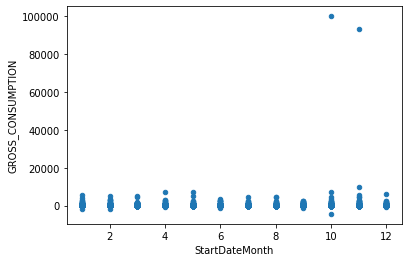

In [76]:
df.plot.scatter( x='StartDateMonth', y='GROSS_CONSUMPTION');

In [54]:
df.head()

,POSTAL_TOWN,POSTCODE_OUTCODE,PROPERTY_CLASS,METER_KEY,READING_START_DATE,READING_END_DATE,READING_START_READING,READING_END_READING,GROSS_CONSUMPTION,DAILY_AVERAGE_CONSUMPTION,READING_SOURCE,CUSTOMER_TYPE,BILLPAYER_AGE,CURRENT_OCCUPANCY_AGE,StartDateMonth,EndDateMonth
0,NaN,NaN,NaN,1012229,27/06/2014 00:00,08/09/2014 00:00,339.0,345.0,6,0.081,Actual Automated Meter Reading,,NaN,5.0,06/2014,08/2014
1,NaN,NaN,NaN,1012229,06/12/2014 00:00,09/03/2015 00:00,360.0,386.0,26,0.277,Actual Automated Meter Reading,,NaN,0.0,06/2014,09/2015
2,NaN,,All new Domestic Properties,755928,11/02/2014 00:00,29/04/2014 00:00,2678.0,2716.0,38,0.487,Actual Automated Meter Reading,,NaN,8.0,11/2014,04/2014
3,NaN,,All new Domestic Properties,755928,09/08/2014 00:00,10/11/2014 00:00,2768.0,2845.0,77,0.819,Actual Automated Meter Reading,,NaN,8.0,09/2014,10/2014
4,NaN,,House RV 100-124,882360,25/01/2014 00:00,24/04/2014 00:00,98.0,102.0,4,0.044,Actual Automated Meter Reading,,81+,7.0,01/2014,04/2014


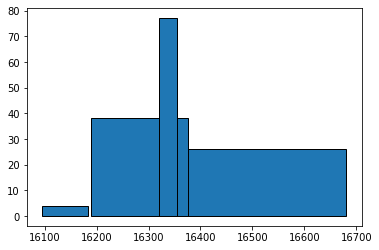

In [65]:

import matplotlib.pyplot as plt
import pandas as pd
df3 = pd.DataFrame({"begin": df["READING_START_DATE"], "end" : df["READING_END_DATE"], "val" : df["GROSS_CONSUMPTION"]}).head()
fig, ax = plt.subplots()
for x_1 , x_2 , x_3 in zip(df3['begin'].values ,df3['end'].values,df3['val'].values):
    ax.add_patch(plt.Rectangle((x_1,0),x_2-x_1,x_3,edgecolor="black"))
ax.autoscale()
plt.show()


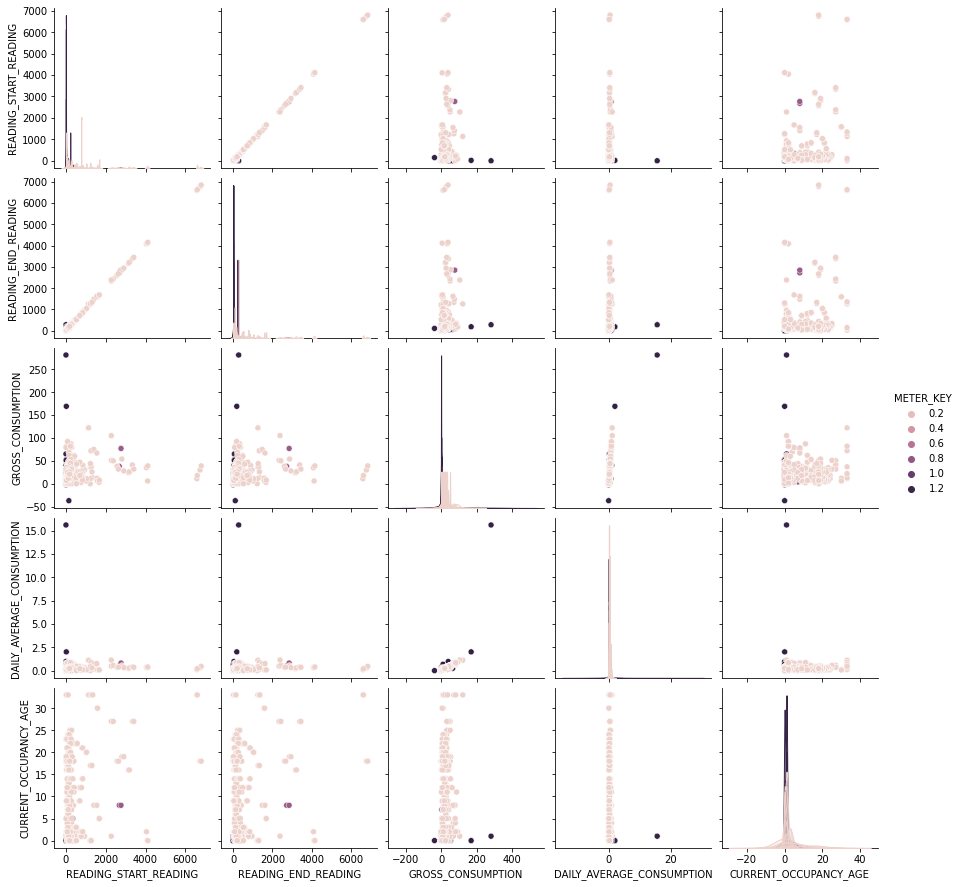

In [72]:
sns.pairplot(data=df.head(500), hue="METER_KEY")


In [ ]:
sns.catplot(data=df.head(100), kind="swarm", x="READING_START_DATE", y="GROSS_CONSUMPTION", hue="POSTAL_TOWN")


KeyboardInterrupt: 

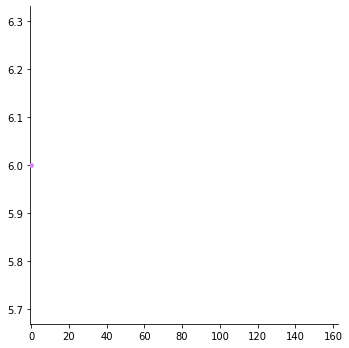

In [74]:
sns.catplot(data=df.head(1100), kind="swarm", x="READING_START_DATE", y="GROSS_CONSUMPTION", hue="METER_KEY")


In [ ]:
sns.displot(data=df, x="READING_START_DATE", col="POSTAL_TOWN", kde=True)
